# ifood case - data exploration 
Robson Müller

The problem

The company has invested in a pilot marketing campaign in order to sell a gadget, involving 2.240 customers, which were later contacted by phone and the ones who bougth were labeled. This campaign had a negative profit of around -3.046MU with a sucess rate of 15%. 

"Hey guys, how could we help the company to succeed in this project and make this campaing more effective and profitable ?"

After some discussion, we approched 2 main tasks:

    1. Provide an insightfull data exploration filled with cause and effect for better marketing team understanding of the characteristics features of respondents.  
    2. Customer segmentation proposal based on behavior.
    3. Develop a model in order to predict customer behavior and find out those which are most likely to accept the offer, making the campaing highly profitable. 

In order to help the company to succeed in this marketing campaing we will produce some data analysis and model development, following the data science methodology, briefly resumed as: Business understanding --> Analytic approach --> Data Requirments --> Data Collection --> Data Understanding --> Data Preparation --> Modelling --> Evaluation --> Deployment --> Feedback. 

# Data understanding 

In [277]:
import pandas as pd
import seaborn as sns
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt

In [278]:
df_raw = pd.read_csv('ml_project1_data.csv')

In [279]:
df_raw.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,...,20,1,0,0,0,0,0,3,11,0


In [280]:
print(df_raw.dtypes)

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object


Let's take a look in the features at once. 

In [281]:
for i in df_raw.columns:
    x = df_raw[i].value_counts()
    print("Nome da variável:",i,"\nContagem de valores:",'\n',x)
    print()

Nome da variável: ID 
Contagem de valores: 
 2546     1
967      1
5396     1
5394     1
7441     1
        ..
5654     1
2698     1
11133    1
3389     1
0        1
Name: ID, Length: 2240, dtype: int64

Nome da variável: Year_Birth 
Contagem de valores: 
 1976    89
1971    87
1975    83
1972    79
1978    77
1970    77
1973    74
1965    74
1969    71
1974    69
1956    55
1958    53
1979    53
1977    52
1952    52
1968    51
1959    51
1954    50
1966    50
1960    49
1955    49
1982    45
1963    45
1967    44
1962    44
1951    43
1957    43
1964    42
1983    42
1986    42
1980    39
1981    39
1984    38
1961    36
1953    35
1985    32
1989    30
1949    30
1988    29
1950    29
1987    27
1948    21
1990    18
1946    16
1947    16
1991    15
1992    13
1945     8
1944     7
1943     7
1995     5
1993     5
1994     3
1996     2
1940     1
1893     1
1899     1
1941     1
1900     1
Name: Year_Birth, dtype: int64

Nome da variável: Education 
Contagem de valores: 
 Graduation

Before a deeper analysis we will check for empty values. I personally like to use missingno library, once it shows visually the distribution of them

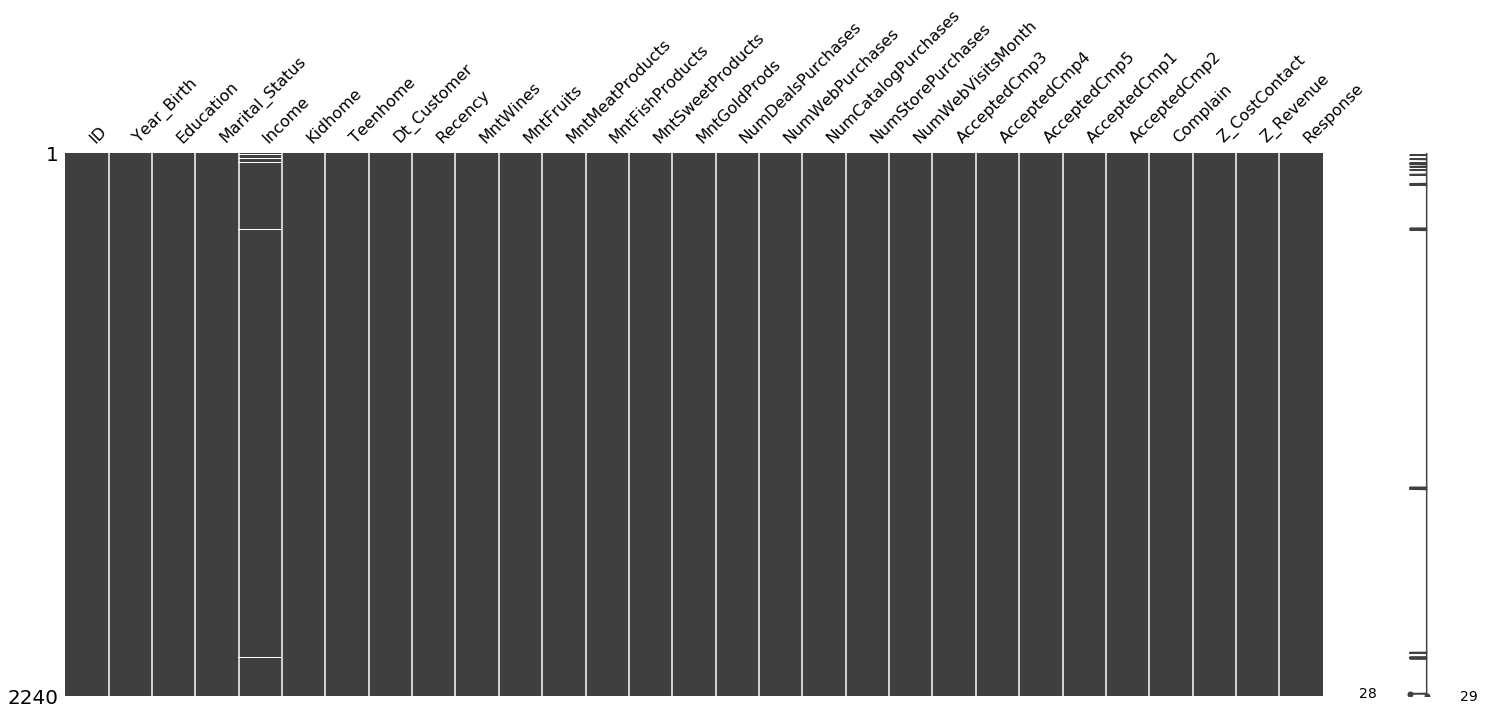

In [282]:
msno.matrix(df_raw)

Having the data seen we concluded some adjustment are necessary, going to the next step: Data preparation, which includes changing labels, data standardization and normalization.

Change column names for better understanding

In [283]:
df = df_raw.rename(columns={'Year_Birth':'Year_birth',
                            'Marital_Status':'Marital_status',
                            'Kidhome':'N_kids',
                            'Teenhome':'N_teens',
                            'Dt_Customer':'Customer_entry_date',
                            'Recency':'Days_last_purchase',
                            'MntMeatProducts':'MntMeat',
                            'MntFishProducts':'MntFish',
                            'MntSweetProducts':'MntSweet',
                            'MntGoldProds':'MntGold',
                            'NumDealsPurchases':'N_purchases_discount',
                            'NumWebPurchases':'N_purchases_website',
                            'NumCatalogPurchases':'N_purchases_catalog',
                            'NumWebVisitsMonth':'N_visits_site_month',
                            'NumStorePurchases':'N_purchases_store',
                            'Z_CostContact':'Cost_per_cmp',
                            'Z_Revenue':'Total_revenue',
                            'Response':'AcceptedLastCmp',
                            'Complain':'Complain_last_2yrs'})

There were two fields not explained in the paper. (Z_Revenue and Z_CostContact) So, we have considered them as being the revenue generated by the campaing and the cost per campaing respectively

In [284]:
df['Customer_entry_date'] = pd.to_datetime(df['Customer_entry_date'],format='%Y-%m-%d')

In [285]:
df.dtypes

ID                               int64
Year_birth                       int64
Education                       object
Marital_status                  object
Income                         float64
N_kids                           int64
N_teens                          int64
Customer_entry_date     datetime64[ns]
Days_last_purchase               int64
MntWines                         int64
MntFruits                        int64
MntMeat                          int64
MntFish                          int64
MntSweet                         int64
MntGold                          int64
N_purchases_discount             int64
N_purchases_website              int64
N_purchases_catalog              int64
N_purchases_store                int64
N_visits_site_month              int64
AcceptedCmp3                     int64
AcceptedCmp4                     int64
AcceptedCmp5                     int64
AcceptedCmp1                     int64
AcceptedCmp2                     int64
Complain_last_2yrs       

We will now check for data discrepancy and then fill the empty data for Income. Probably using it's median, once the std is very large. 

In [286]:
df.describe()

,ID,Year_birth,Income,N_kids,N_teens,Days_last_purchase,MntWines,MntFruits,MntMeat,MntFish,...,N_visits_site_month,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain_last_2yrs,Cost_per_cmp,Total_revenue,AcceptedLastCmp
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [287]:
df.describe(include = ['object'])

,Education,Marital_status
count,2240,2240
unique,5,8
top,Graduation,Married
freq,1127,864


As we've seen the std for income is very large. It indicates some outliers. After some check's we decided to cut the outliers down to 110000 of income. In the other hand we need to deal with the lower quartile. There are some data with an extremely low income. What makes us deduce they are assigned with monthly income not annual income just as the rest of the data shows.

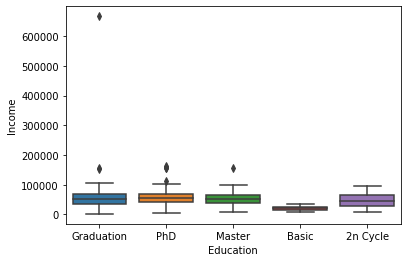

In [288]:
sns.boxplot(x='Education', y='Income', data=df)

In [289]:
df = df[df.Income < 110000] 

In [290]:
df['Marital_status'].value_counts()

Married     854
Together    569
Single      470
Divorced    231
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_status, dtype: int64

Thera are some weird values for Marital_Status, let's check their statistical significance and remove or replace by the mode if necessary

In [291]:
df = df.replace(to_replace = 'Alone',value = 'Single')
df.drop(df.loc[df['Marital_status']=='Absurd'].index, inplace=True)
df.drop(df.loc[df['Marital_status']=='YOLO'].index, inplace=True)
df.reset_index(drop=True)

,ID,Year_birth,Education,Marital_status,Income,N_kids,N_teens,Customer_entry_date,Days_last_purchase,MntWines,...,N_visits_site_month,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain_last_2yrs,Cost_per_cmp,Total_revenue,AcceptedLastCmp
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2198,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2199,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2200,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2201,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [292]:
income_filter = df[['Education','Income','Marital_status']]
income_groupby = income_filter.groupby(['Marital_status','Education'],as_index=False).mean()
income_groupby.sort_values(by='Income',ascending=True)

,Marital_status,Education,Income
1,Divorced,Basic,9548.000000
11,Single,Basic,18238.666667
16,Together,Basic,21240.071429
6,Married,Basic,21960.500000
21,Widow,Basic,22123.000000
15,Together,2n Cycle,44736.410714
5,Married,2n Cycle,46201.100000
0,Divorced,2n Cycle,49395.130435
3,Divorced,Master,50331.945946
7,Married,Graduation,50800.258741


In [293]:
avg_income = df['Income'].astype('float').median(axis=0)
print('Average Income is: ',avg_income)

Average Income is:  51287.0


In [294]:
df['Income'].replace(np.nan, avg_income, inplace=True)

In [295]:
#df.head(15)

We will create a new field to calculate the CAC for each customer, using  (Cost_per_cmp x Number of campaigns necessary for conversion), since they presented a different behavior along the 6 campaings. And reverse the get_dummies() for the campaing. In order to better visualize. 

In [296]:
df_cmp = df[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedLastCmp']]
df_cmp = df_cmp.rename(columns={'AcceptedCmp1':'cmp1',
                                'AcceptedCmp2':'cmp2',
                                'AcceptedCmp3':'cmp3',
                                'AcceptedCmp4':'cmp4',
                                'AcceptedCmp5':'cmp5',
                                'AcceptedLastCmp':'cmp6'})
                            

In [297]:
df_cmp['Conversion_cmp'] = df_cmp.idxmax(1)
#df_cmp.head(20)

In [298]:
df_cmp['Conversion_cmp'] = np.where((df_cmp['cmp1'] == 0) & 
                                    (df_cmp['cmp2'] == 0) &
                                    (df_cmp['cmp3'] == 0) &
                                    (df_cmp['cmp4'] == 0) &
                                    (df_cmp['cmp5'] == 0) &
                                    (df_cmp['cmp6'] == 0), 
                                    'no_conversion', df_cmp['Conversion_cmp'])

In [299]:
def campaing_to_n(cmp):
    if cmp == 'cmp1':
        return 1
    elif cmp == 'cmp2':
        return 2
    elif cmp == 'cmp3':
        return 3
    elif cmp == 'cmp4':
        return 4
    elif cmp == 'cmp5':
        return 5
    elif cmp == 'cmp6':
        return 6
    elif cmp == 'no_conversion':
        return 6

In [300]:
df_cmp['N_cmp'] = df_cmp['Conversion_cmp'].apply(campaing_to_n)

In [301]:
col_remove = ['cmp1','cmp2','cmp3','cmp4','cmp5','cmp6']
df_cmp.drop(col_remove, axis=1, inplace=True)

In [302]:
#df_cmp.head(20)

In [303]:
df_cmp['Conversion_cmp'].value_counts()

no_conversion    1600
cmp6              145
cmp1              141
cmp3              135
cmp4              107
cmp5               58
cmp2               17
Name: Conversion_cmp, dtype: int64

In [304]:
x = df_cmp.loc[df_cmp['Conversion_cmp'] == 'no_conversion', 'N_cmp'].count()
y = df_cmp['Conversion_cmp'].count()

rate = x/y*100
rate

72.62823422605538

Now we have a better understanding of the customers who acctually bougth the Gadget, how many attempts where necessary in order to convert this customer and those ones who did not buy the offer.

Which represent 72% of the contacted customers

In [305]:
df = df.join(df_cmp)

So, we calculate the Cac, multipling the Cost per Campaing and the Number of campaings necessary to convert the specific customer. 

We also checked that the Total_revenue (original Z_Revenue) which we assumed is the amount generated trought the sales of the Gadget were filled including those customers which do not converted in any campaing. We filled with zero all customers with no conversion in any campaing.


In [306]:
df['Total_revenue'] = np.where((df['Conversion_cmp'] == 'no_conversion'), 0, df['Total_revenue'])


In [307]:
df['Cac'] = df['Cost_per_cmp'] * df['N_cmp']


In [308]:
df.head(20)

,ID,Year_birth,Education,Marital_status,Income,N_kids,N_teens,Customer_entry_date,Days_last_purchase,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain_last_2yrs,Cost_per_cmp,Total_revenue,AcceptedLastCmp,Conversion_cmp,N_cmp,Cac
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,3,11,1,cmp6,6,18
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,3,0,0,no_conversion,6,18
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,0,0,no_conversion,6,18
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,3,0,0,no_conversion,6,18
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,0,0,no_conversion,6,18
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,0,0,0,0,3,0,0,no_conversion,6,18
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,...,0,0,0,0,3,0,0,no_conversion,6,18
7,6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,...,0,0,0,0,3,0,0,no_conversion,6,18
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,...,0,0,0,0,3,11,1,cmp6,6,18
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,...,0,0,0,0,3,11,0,cmp3,3,9


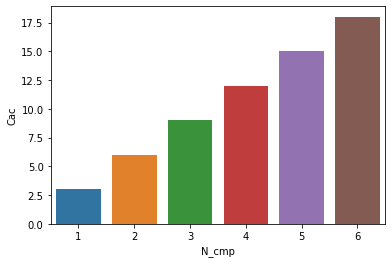

In [309]:
sns.barplot(x='N_cmp', y='Cac', data=df)

We will check the distribution of customers which bought the offer, and in which campaign 

In [310]:
df_cmp = df[df.Conversion_cmp != 'no_conversion']

In [311]:
x = df_cmp['N_cmp'].value_counts()

for n in x:
    z = n / df_cmp['N_cmp'].count()
    print(x.index,n,z)


Int64Index([6, 1, 3, 4, 5, 2], dtype='int64') 145 0.24046434494195687
Int64Index([6, 1, 3, 4, 5, 2], dtype='int64') 141 0.23383084577114427
Int64Index([6, 1, 3, 4, 5, 2], dtype='int64') 135 0.22388059701492538
Int64Index([6, 1, 3, 4, 5, 2], dtype='int64') 107 0.17744610281923714
Int64Index([6, 1, 3, 4, 5, 2], dtype='int64') 58 0.09618573797678276
Int64Index([6, 1, 3, 4, 5, 2], dtype='int64') 17 0.028192371475953566


# Finally data ready for Analysis. 

As a product of our Data preparation and Understanding we achieved some conclusions:
    
    1. 72% of the customers actually did not buy the offer
    2. We calculated the CAC for each customer until the offer necessary for his/her conversion
    3. There were some adjustments for Marital_status
    4. We removed extreme outliers considering Income



We will start our analysis by the metric just calculated. To discover which were the most expensive customer considering the 'Gadget Offer'

In [312]:
cac_filter_education = df_cmp[['Education','Marital_status','Cac']]
cac_groupby_education = cac_filter_education.groupby(['Marital_status','Education'],as_index=False).mean()

cac_filter_kids = df_cmp[['N_kids','Marital_status','Cac']]
cac_groupby_kids = cac_filter_kids.groupby(['Marital_status','N_kids'],as_index=False).mean()

cac_filter_teens = df[['N_teens','Marital_status','Cac']]
cac_groupby_teens = cac_filter_teens.groupby(['Marital_status','N_teens'],as_index=False).mean()

In [313]:
cac_pivot_education = cac_groupby_education.pivot(index='Marital_status',columns='Education')
cac_pivot_kids = cac_groupby_kids.pivot(index='Marital_status',columns='N_kids')
cac_pivot_teens = cac_groupby_teens.pivot(index='Marital_status',columns='N_teens')

#cac_pivot_education
#cac_pivot_kids
#cac_pivot_teens

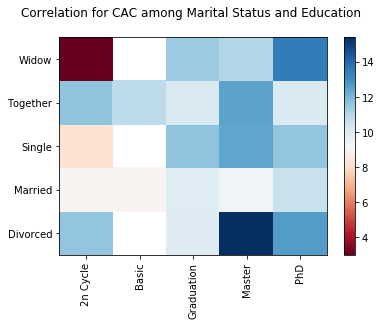

In [314]:
fig, ax = plt.subplots()
im = ax.pcolor(cac_pivot_education, cmap='RdBu')

plt.title("Correlation for CAC among Marital Status and Education \n")

#label names
row_labels = cac_pivot_education.columns.levels[1]
col_labels = cac_pivot_education.index

#move ticks and labels to the center
ax.set_xticks(np.arange(cac_pivot_education.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(cac_pivot_education.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

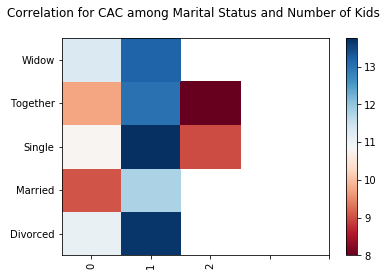

In [315]:
fig, ax = plt.subplots()
im = ax.pcolor(cac_pivot_kids, cmap='RdBu')

plt.title("Correlation for CAC among Marital Status and Number of Kids \n")

#label names
row_labels = cac_pivot_kids.columns.levels[1]
col_labels = cac_pivot_kids.index

#move ticks and labels to the center
ax.set_xticks(np.arange(cac_pivot_education.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(cac_pivot_education.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()


People with lower Education level and Income did not accepted the offer when they live alone (the white box means there is no CAC for these groups, in other words they are labeled as “no_conversion”)




In [316]:
df_revenue_filter = df[['Marital_status','Education','Total_revenue']]
df_revenue_group1 = df_revenue_filter.groupby(['Education'],as_index=False).sum()
df_revenue_group1.sort_values(by='Total_revenue',ascending=False)

,Education,Total_revenue
2,Graduation,3245
4,PhD,1727
3,Master,1089
0,2n Cycle,495
1,Basic,77


As we can check. People with Low Education level were not inpacted by this campaing. Since they were the group with lowest conversion and higher CAC. 

We will now check the correlation among all variables, in order to investigate better.

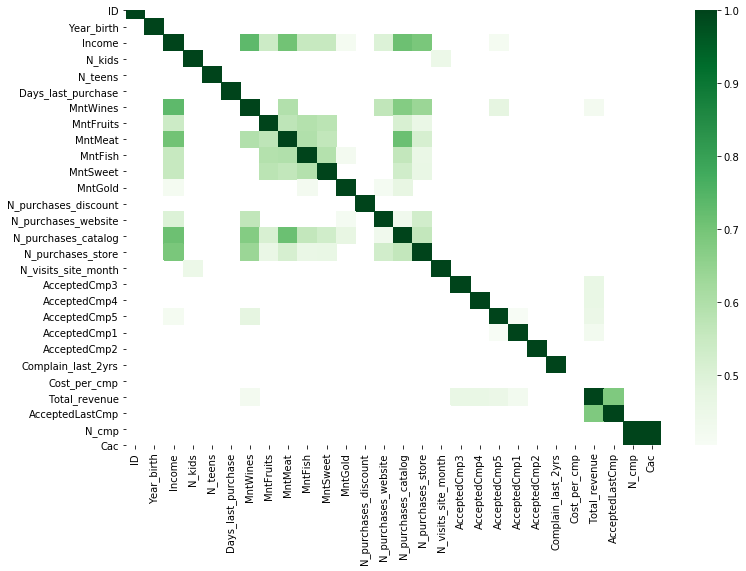

In [317]:
corr = df.corr()

kot = corr[corr>=.4]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Greens")

We checked there is a positive relationship among Income and consumption of products such as Wines, Meats, Store and Catalog purchases. 



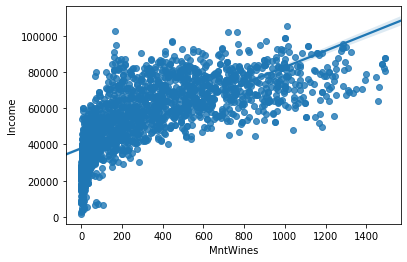

In [318]:
sns.regplot(x='MntWines', y='Income', data=df)

When the Income is higher than 30K the Wine consumption increases exponentially

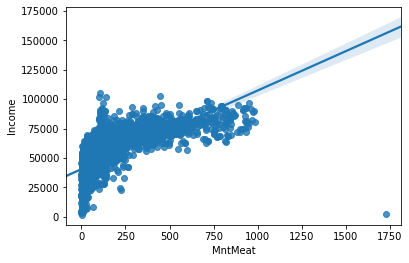

In [319]:
sns.regplot(x='MntMeat', y='Income', data=df)

The same happens for Meat. But at 25K and stabilizes at around 80K Income

We binned the Income data, in order to better visualize. Now we have 3 categories. The Low Income customers represents approximately 50% 

In [320]:
bins = np.linspace(min(df["Income"]), max(df["Income"]), 4)
bins

array([  1730.        ,  36310.33333333,  70890.66666667, 105471.        ])

In [321]:
group_names = ['Low Income', 'Medium Income', 'High Income']
df['Income_binned'] = pd.cut(df['Income'], bins, labels=group_names, include_lowest=True )
df[['Income','Income_binned']].head(5)

,Income,Income_binned
0,58138.0,Medium Income
1,46344.0,Medium Income
2,71613.0,High Income
3,26646.0,Low Income
4,58293.0,Medium Income


Text(0.5, 1.0, 'Income bins')

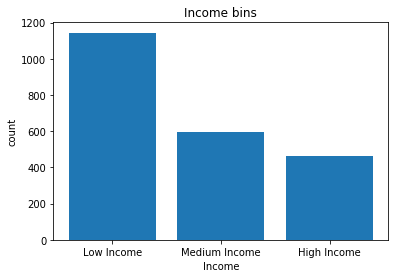

In [322]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["Income_binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("Income")
plt.pyplot.ylabel("count")
plt.pyplot.title("Income bins")

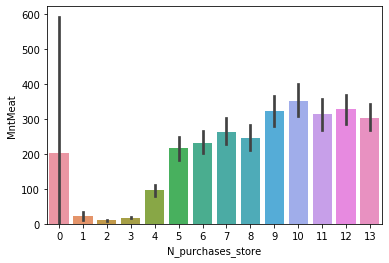

In [323]:
sns.barplot(x='N_purchases_store', y='MntMeat', data=df)

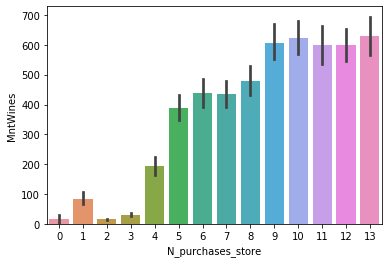

In [324]:
sns.barplot(x='N_purchases_store', y='MntWines', data=df)

When customers accumulate more than 4 shops in stores their Meat consumption increases 2x

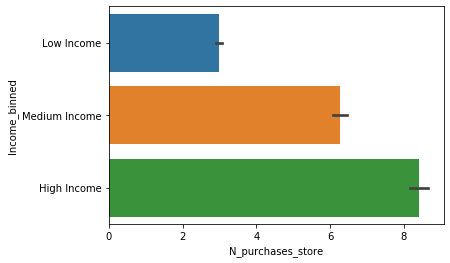

In [325]:
sns.barplot(x='N_purchases_store', y='Income_binned', data=df)

Customers more then double their consuption is stores when they are Medium and High Income

In [326]:
wine_filter = df[['Income_binned','MntWines']]
wine_group = wine_filter.groupby(['Income_binned'],as_index=False).mean()

print('Avg amount of Wine bougth by Income Group \n')
print(wine_group)

Avg amount of Wine bougth by Income Group 

   Income_binned    MntWines
0     Low Income   23.147651
1  Medium Income  311.590035
2    High Income  657.138229


In [327]:
meat_filter = df[['Income_binned','MntMeat']]
meat_group = meat_filter.groupby(['Income_binned'],as_index=False).mean()

print('Avg amount of Meat bougth by Income Group \n')
print(meat_group)

Avg amount of Meat bougth by Income Group 

   Income_binned     MntMeat
0     Low Income   23.187919
1  Medium Income  123.078671
2    High Income  452.997840


In [328]:
store_filter = df[['Income_binned','N_purchases_store']]
store_group = store_filter.groupby(['Income_binned'],as_index=False).mean()

print('Avg amount of Going to Store by Income Group \n')
print(store_group)

Avg amount of Going to Store by Income Group 

   Income_binned  N_purchases_store
0     Low Income           2.979866
1  Medium Income           6.257867
2    High Income           8.399568


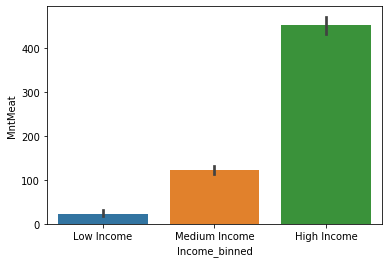

In [329]:
sns.barplot(x='Income_binned', y='MntMeat', data=df)

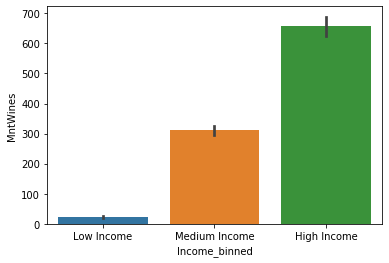

In [330]:
sns.barplot(x='Income_binned', y='MntWines', data=df)

In [331]:
behavior1_low_visits_store = df[df.N_purchases_store < 4]


In [332]:
behavior1_low_visits_store.shape

(715, 33)

So, in conclusion of this step we can recommend the following strategy based on behavior:
    
    1. When customer visits stores more then 4 times. His/her meat and wine consumption tends to double 
    2. Medium and High Income customers buy up to 2x-3x times more in stores then Low Income customers
    
    A campaign could be launched in order to bring to stores high and medium Income customers which have not completed 4 store visits. These customers were split in the ifood_customers_to_attack file

In [333]:
df.to_csv('ifood_data_analysis_final.csv')

In [334]:
behavior1_low_visits_store.to_csv('ifood_customers_to_attack.csv')